# 一、逻辑回归(Logistic Regression)

### 1.1 分类问题

**binary classification二元分类**，变量$y\in { 0,1 \\}$ ，其中 0 表示负向类，1 表示正向类

希望我们的分类器的输出值在0和1之间

线性回归模型，因为其预测的值可以超越[0,1]的范围，并不适合解决固定一个阈值的分类问题

其中：$X$ 代表特征向量  $g$ 代表逻辑函数（**logistic function**)，该模型的输出变量范围始终在0和1之间

常用的逻辑函数为**S**形函数（**Sigmoid function**）
$$
g\left( z \right)=\frac{1}{1+{{e}^{-z}}}\\
h_\theta \left( x \right)=g\left(\theta^{T}X \right)
$$


$h_\theta \left( x \right)$的作用是，对于给定的输入变量，根据选择的参数计算输出变量=1的可能性（**estimated probablity**）即$h_\theta \left( x \right)=P\left( y=1|x;\theta \right)$

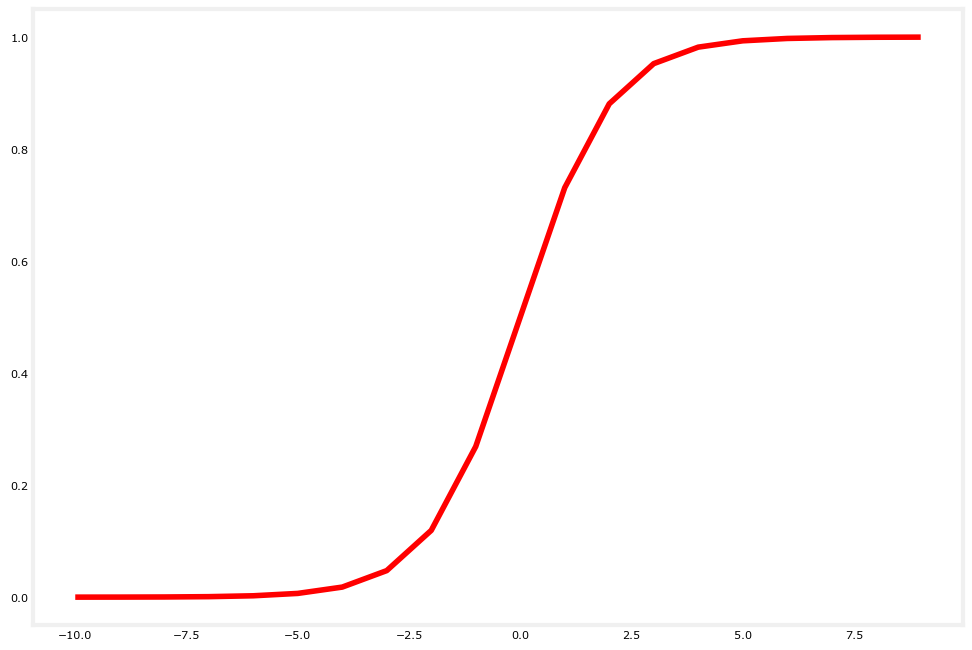

In [1306]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def sigmoid(z):
    return 1 / (1 + np.exp(-z))
nums = np.arange(-10, 10, step=1)
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(nums, sigmoid(nums), 'r')
plt.show()

### 1.2 判定边界
(**decision boundary**)
在逻辑回归中，我们预测：

- 当${h_\theta}\left( x \right)>=0.5$时, 即${\theta^{T}}x>=0$  ，预测 $y=1$。

- 当${h_\theta}\left( x \right)<0.5$时， 即${\theta^{T}}x<0$ ，预测 $y=0$ 。

> 并且参数$\theta$ 是向量[-3 1 1]。 则当$-3+{x_1}+{x_2} \geq 0$，即${x_1}+{x_2} \geq 3$时，模型将预测 $y=1$。
> 我们可以绘制直线${x_1}+{x_2} = 3$，这条线便是我们模型的分界线，将预测为1的区域和预测为 0的区域分隔开。
> ![](images/p020.jpg)
>
> 假使我们的数据呈现这样的分布情况，怎样的模型才能适合呢？
> ![](images/p019.jpg)
>
> 因为需要用曲线才能分隔 $y=0$ 的区域和 $y=1$ 的区域，我们需要二次方特征：${h_\theta}\left( x \right)=g\left( {\theta_0}+{\theta_1}{x_1}+{\theta_{2}}{x_{2}}+{\theta_{3}}x_{1}^{2}+{\theta_{4}}x_{2}^{2} \right)$是[-1 0 0 1 1]，则我们得到的判定边界恰好是圆点在原点且半径为1的圆形

### 1.3 代价函数

逻辑回归模型中的代价为均方最小，如果沿用的话，当我们将${h_\theta}\left( x \right)=\frac{1}{1+{e^{-\theta^{T}x}}}$带入到这样定义了的代价函数中时，我们得到的代价函数将是一个非凸函数（**non-convexfunction**）

![](images/8b94e47b7630ac2b0bcb10d204513810.jpg)

这意味着我们的代价函数有许多局部最小值，这将影响梯度下降算法寻找全局最小值。

线性回归的代价函数为：$J\left( \theta  \right)=\frac{1}{m}\sum\limits_{i=1}^{m}{\frac{1}{2}{{\left( {h_\theta}\left({x}^{\left( i \right)} \right)-{y}^{\left( i \right)} \right)}^{2}}}$ 。
逻辑回归的代价函数（可以由极大似然估计得到）为：$J\left( \theta  \right)=\frac{1}{m}\sum\limits_{i=1}^{m}{{Cost}\left( {h_\theta}\left( {x}^{\left( i \right)} \right),{y}^{\left( i \right)} \right)}$  ${h_\theta} \in (0,1) $，其中
$$
\operatorname{Cos}t({{h}_{\theta }}(x),y)=\left\{ \begin{matrix}
   -\log ({{h}_{\theta }}(x))&if\quad y=1  \\
   -\log (1-{{h}_{\theta }}(x))&if\quad y=0  \\
\end{matrix} \right.
$$
${h_\theta}\left( x \right)$与 $Cost\left( {h_\theta}\left( x \right),y \right)$之间的关系如下图所示：

![](images/ffa56adcc217800d71afdc3e0df88378.jpg)

简化为： 
$$
Cost\left( {h_\theta}\left( x \right),y \right)=-y\times log\left( {h_\theta}\left( x \right) \right)-(1-y)\times log\left( 1-{h_\theta}\left( x \right) \right)
\\
J\left( \theta  \right)=-\frac{1}{m}\sum\limits_{i=1}^{m}{[{{y}^{(i)}}\log \left( {h_\theta}\left( {{x}^{(i)}} \right) \right)+\left( 1-{{y}^{(i)}} \right)\log \left( 1-{h_\theta}\left( {{x}^{(i)}} \right) \right)]}
$$
**Python**代码实现：

In [1307]:
def cost(theta, X, y):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    first = np.multiply(-y, np.log(sigmoid(X * theta.T)))
    second = np.multiply((1 - y), np.log(1 - sigmoid(X * theta.T)))
    return np.sum(first - second) / (len(X))

### 1.4 梯度下降

**Repeat** {

$\theta_j := \theta_j - \alpha \frac{1}{m}\sum\limits_{i=1}^{m}{{\left( {h_\theta}\left( \mathop{x}^{\left( i \right)} \right)-\mathop{y}^{\left( i \right)} \right)}}\mathop{x}_{j}^{(i)}$ 
**(simultaneously update all** )

}

根据凸性分析，可以证明代价函数$J(\theta)$会是一个凸函数，并且没有局部最优值

注意需要提前特征缩放
除了梯度下降算法以外，还有一些常被用来令代价函数最小的算法，这些算法更加复杂和优越，而且通常不需要人工选择学习率，通常比梯度下降算法要更加快速。这些算法有：

**共轭梯度**（**Conjugate Gradient**），**局部优化法**(**Broyden fletcher goldfarb shann,BFGS**)和**有限内存局部优化法**(**LBFGS**) 

这三种算法有许多优点：

一个是使用这其中任何一个算法，你通常不需要手动选择学习率 $\alpha$，所以对于这些算法的一种思路是，给出计算导数项和代价函数的方法，你可以认为算法有一个智能的内部循环，称为**线性搜索**(**line search**)算法，它可以自动尝试不同的学习速率 $\alpha$，并自动选择一个好的学习速率 $a$，因此它甚至可以为每次迭代选择不同的学习速率，那么你就不需要自己选择。这些算法实际上在做更复杂的事情，不仅仅是选择一个好的学习速率，所以它们往往最终比梯度下降收敛得快多了。

In [1308]:
def gradient(theta, X, y):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    parameters = int(theta.ravel().shape[1])
    grad = np.zeros(parameters)
    error = sigmoid(X * theta.T) - y
    for i in range(parameters):
        term = np.multiply(error, X[:,i])
        grad[i] = np.sum(term) / len(X)
    return grad

### 1.5 多类别分类：一对多

一对多的分类工作，有时这个方法也被称为"一对余"方法。

![](images/450a83c67732d254dbac2aeeb8ab910c.png)

现在我们有一个训练集，好比上图表示的有3个类别，我们用三角形表示 $y=1$，方框表示$y=2$，叉叉表示 $y=3$。我们下面要做的就是使用一个训练集，将其分成3个二元分类问题。我们先从用三角形代表的类别1开始，实际上我们可以创建一个，新的"伪"训练集，类型2和类型3定为负类，类型1设定为正类，我们创建一个新的训练集，如下图所示的那样，我们要拟合出一个合适的分类器。

![](images/b72863ce7f85cd491e5b940924ef5a5f.png)

这里的三角形是正样本，而圆形代表负样本。可以这样想，设置三角形的值为1，圆形的值为0，下面我们来训练一个标准的逻辑回归分类器，这样我们就得到一个正边界。

为了能实现这样的转变，我们将多个类中的一个类标记为正向类（$y=1$），然后将其他所有类都标记为负向类，这个模型记作$h_\theta^{\left( 1 \right)}\left( x \right)$。接着，类似地第我们选择另一个类标记为正向类（$y=2$），再将**其它类**都标记为负向类，将这个模型记作 $h_\theta^{\left( 2 \right)}\left( x \right)$,依此类推。
最后我们得到一系列的模型简记为： $h_\theta^{\left( i \right)}\left( x \right)=p\left( y=i|x;\theta  \right)$其中：$i=\left( 1,2,3....k \right)$ 

**将所有的分类机都运行一遍，然后对每一个输入变量，都选择最高可能性的输出变量**

总之，我们已经把要做的做完了，现在要做的就是训练这个逻辑回归分类器：$h_\theta^{\left( i \right)}\left( x \right)$， 其中 $i$ 对应每一个可能的 $y=i$，最后，为了做出预测，我们给出输入一个新的 $x$ 值，用这个做预测。我们要做的就是在我们三个分类器里面输入 $x$，然后我们选择一个让 $h_\theta^{\left( i \right)}\left( x \right)$ 最大的$ i$，即$\mathop{\max}\limits_i\,h_\theta^{\left( i \right)}\left( x \right)$。

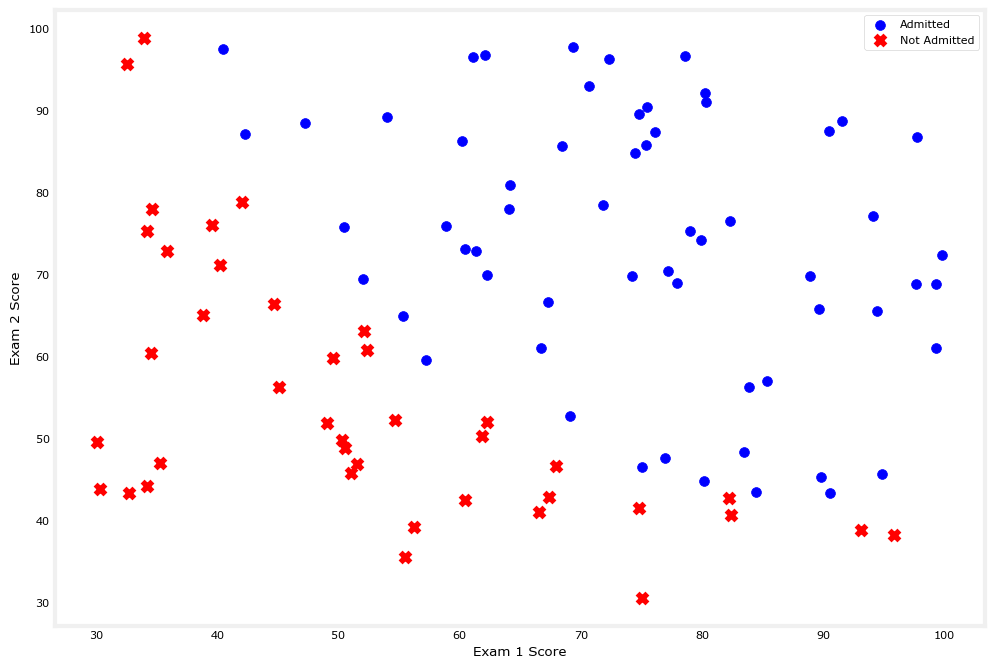

In [1309]:
# 样例：
# 通过申请学生两次测试的评分，来决定他们是否被录取。
# 现在你拥有之前申请学生的可以用于训练逻辑回归的训练样本集。
# 对于每一个训练样本，你有他们两次测试的评分和最后是被录取的结果

data = pd.read_csv('data/ex2data1.txt', header=None, names=['Exam 1', 'Exam 2', 'Admitted'])
plt.style.use('data/deeplearning.mplstyle')
positive = data[data['Admitted'].isin([1])]
negative = data[data['Admitted'].isin([0])]

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(positive['Exam 1'], positive['Exam 2'], s=50, c='b', marker='o', label='Admitted')
ax.scatter(negative['Exam 1'], negative['Exam 2'], s=50, c='r', marker='x', label='Not Admitted')
ax.legend()
ax.set_xlabel('Exam 1 Score')
ax.set_ylabel('Exam 2 Score')
plt.show()

# add a ones column - this makes the matrix multiplication work out easier
data.insert(0, 'Ones', 1)
# set X (training data) and y (target variable)
cols = data.shape[1]
X = data.iloc[:,0:cols-1]
y = data.iloc[:,cols-1:cols]
X = np.array(X.values)
y = np.array(y.values)
theta = np.zeros(3) # 初始化 theta

accuracy = 89%


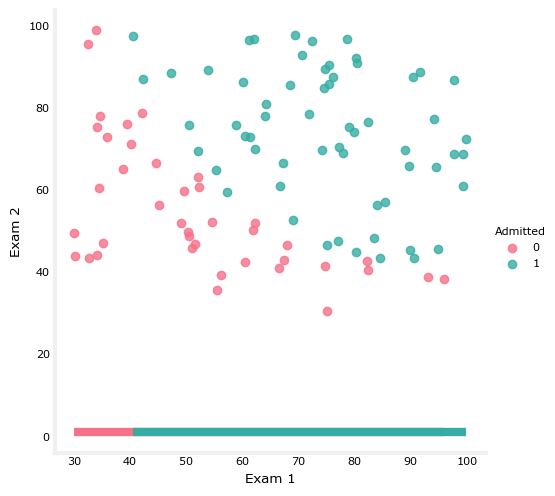

In [1310]:
##  直接用用SciPy's truncated newton（TNC）实现寻找最优参数
import scipy.optimize as opt
result = opt.fmin_tnc(func=cost, x0=theta, fprime=gradient, args=(X, y))
###  预测函数，这里设置阈值为0.5
def predict(theta, X):
    probability = sigmoid(X * theta.T)
    return [1 if x >= 0.5 else 0 for x in probability]

theta_min = np.matrix(result[0])
predictions = predict(theta_min, X)
correct = [1 if ((a == 1 and b == 1) or (a == 0 and b == 0)) else 0 for (a, b) in zip(predictions, y)]
accuracy = (sum(map(int, correct)) % len(correct))

print ('accuracy = {0}%'.format(accuracy))

sns.lmplot(x="Exam 1",
    y="Exam 2",
    data=data,
    hue="Admitted",
    y_jitter= .02, ###回归噪声
    logistic=True, 
    palette="husl")          

# 二、正则化(Regularization)

### 2.1 过拟合的问题

**over-fitting**

图是一个回归问题的例子：

![](images/p017.jpg)

第一个模型是一个线性模型，欠拟合，不能很好地适应我们的训练集；第三个模型是一个四次方的模型，过于强调拟合原始数据，而丢失了算法的本质：预测新数据。我们可以看出，若给出一个新的值使之预测，它将表现的很差，是过拟合，虽然能非常好地适应我们的训练集但在新输入变量进行预测时可能会效果不好；而中间的模型似乎最合适

分类问题中也存在这样的问题：

![](images/p016.jpg)

就以多项式理解，**$x$ 的次数越高，拟合的越好，但相应的预测的能力就可能变差**

问题是，如果我们发现了过拟合问题，应该如何处理

1. 丢弃一些不能帮助我们正确预测的特征。可以是手工选择保留哪些特征，或者用模型选择的算法来帮忙（例如**PCA**）
2. 正则化。 保留所有的特征，但是减少参数的大小（**magnitude**）

### 2.2 代价函数

如果我们的模型是：
${h_\theta}\left( x \right)={\theta_{0}}+{\theta_{1}}{x_{1}}+{\theta_{2}}{x_{2}^2}+{\theta_{3}}{x_{3}^3}+{\theta_{4}}{x_{4}^4}$
我们可以从之前的事例中看出，正是那些高次项导致了过拟合的产生，所以如果我们能让这些高次项的系数接近于0的话，我们就能很好的拟合了。
所以我们要做的就是在一定程度上减小这些参数$\theta $ 的值，这就是正则化的基本方法。我们决定要减少${\theta_{3}}$和${\theta_{4}}$的大小，我们要做的便是修改代价函数，在其中${\theta_{3}}$和${\theta_{4}}$ 设置一点惩罚。这样做的话，我们在尝试最小化代价时也需要将这个惩罚纳入考虑中，并最终导致选择较小一些的${\theta_{3}}$和${\theta_{4}}$。
修改后的代价函数如下：

$$
\underset{\theta }{\mathop{\min }}\,\frac{1}{2m}[\sum\limits_{i=1}^{m}{{{\left( {{h}_{\theta }}\left( {{x}^{(i)}} \right)-{{y}^{(i)}} \right)}^{2}}+1000\theta _{3}^{2}+10000\theta _{4}^{2}]}
$$

通过这样的代价函数选择出的${\theta_{3}}$和${\theta_{4}}$ 对预测结果的影响就比之前要小许多。假如我们有非常多的特征，我们并不知道其中哪些特征我们要惩罚，我们将对所有的特征进行惩罚，并且让代价函数最优化的软件来选择这些惩罚的程度。这样的结果是得到了一个较为简单的能防止过拟合问题的假设：
$$
J\left( \theta  \right)=\frac{1}{2m}[\sum\limits_{i=1}^{m}{{{({h_\theta}({{x}^{(i)}})-{{y}^{(i)}})}^{2}}+\lambda \sum\limits_{j=1}^{n}{\theta_{j}^{2}}]}
$$
其中$\lambda $又称为正则化参数（**Regularization Parameter**）

 注：根据惯例，我们不对${\theta_{0}}$ 进行惩罚。如果选择的正则化参数$\lambda$ 过大，则会把所有的参数都最小化了，导致模型变成 ${h_\theta}\left( x \right)={\theta_{0}}$，也就是上图中红色直线所示的情况，造成欠拟合。

### 2.3 线性回归 正则化

对于线性回归的求解，我们之前推导了两种学习算法：一种基于梯度下降，一种基于正规方程。

正则化线性回归的代价函数为：

$J\left( \theta  \right)=\frac{1}{2m}\sum\limits_{i=1}^{m}{[({{({h_\theta}({{x}^{(i)}})-{{y}^{(i)}})}^{2}}+\lambda \sum\limits_{j=1}^{n}{\theta _{j}^{2}})]}$

如果我们要使用梯度下降法令这个代价函数最小化，因为我们未对$\theta_0$进行正则化，所以梯度下降算法将分两种情形：

$Repeat$  $until$  $convergence${

​                                                   $\quad\quad{\theta_0}:={\theta_0}-a\frac{1}{m}\sum\limits_{i=1}^{m}{(({h_\theta}({{x}^{(i)}})-{{y}^{(i)}})x_{0}^{(i)}})$ 

​                                                   $\quad\quad{\theta_j}:={\theta_j}-a[\frac{1}{m}\sum\limits_{i=1}^{m}{(({h_\theta}({{x}^{(i)}})-{{y}^{(i)}})x_{j}^{\left( i \right)}}+\frac{\lambda }{m}{\theta_j}]$ 

​                                                             $\quad\quad for$ $j=1,2,...n$

​                                                   }




对上面的算法中$ j=1,2,...,n$ 时的更新式子进行调整可得：

${\theta_j}:={\theta_j}(1-a\frac{\lambda }{m})-a\frac{1}{m}\sum\limits_{i=1}^{m}{({h_\theta}({{x}^{(i)}})-{{y}^{(i)}})x_{j}^{\left( i \right)}}$ 
可以看出，正则化线性回归的梯度下降算法的变化在于，每次都在原有算法更新规则的基础上令$\theta $值减少了一个额外的值。

我们同样也可以利用正规方程来求解正则化线性回归模型，方法如下所示：

![](images/71d723ddb5863c943fcd4e6951114ee3.png)

图中的矩阵尺寸为 $(n+1)*(n+1)$

### 2.4 逻辑回归 正则化

针对逻辑回归问题，我们在之前的课程已经学习过两种优化算法：我们首先学习了使用梯度下降法来优化代价函数$J\left( \theta  \right)$

自己计算导数同样对于逻辑回归，我们也给代价函数增加一个正则化的表达式，得到代价函数：

$J\left( \theta  \right)=\frac{1}{m}\sum\limits_{i=1}^{m}{[-{{y}^{(i)}}\log \left( {h_\theta}\left( {{x}^{(i)}} \right) \right)-\left( 1-{{y}^{(i)}} \right)\log \left( 1-{h_\theta}\left( {{x}^{(i)}} \right) \right)]}+\frac{\lambda }{2m}\sum\limits_{j=1}^{n}{\theta _{j}^{2}}$

要最小化该代价函数，通过求导，得出梯度下降算法为：

$Repeat$  $until$  $convergence${

​                                                   $\quad\quad{\theta_0}:={\theta_0}-a\frac{1}{m}\sum\limits_{i=1}^{m}{(({h_\theta}({{x}^{(i)}})-{{y}^{(i)}})x_{0}^{(i)}})$

​                                                  $\quad\quad{\theta_j}:={\theta_j}-a[\frac{1}{m}\sum\limits_{i=1}^{m}{({h_\theta}({{x}^{(i)}})-{{y}^{(i)}})x_{j}^{\left( i \right)}}+\frac{\lambda }{m}{\theta_j}]$

​                                                 $\quad\quad for$ $j=1,2,...n$

​                                                 }



In [1311]:
def gradientReg(theta, X, y, learningRate):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    parameters = int(theta.ravel().shape[1])
    grad = np.zeros(parameters)
    error = sigmoid(X * theta.T) - y
    for i in range(parameters):
        term = np.multiply(error, X[:,i])
        if (i == 0):
            grad[i] = np.sum(term) / len(X)
        else:
            grad[i] = (np.sum(term) / len(X)) + ((learningRate / len(X)) * theta[:,i])
    return grad

# set X and y (remember from above that we moved the label to column 0)
cols = data2.shape[1]
X2 = data2.iloc[:,1:cols]
y2 = data2.iloc[:,0:1]

# convert to numpy arrays and initalize the parameter array theta
X2 = np.array(X2.values)
y2 = np.array(y2.values)
theta2 = np.zeros(11)
learningRate = 1  # 学习率
result2 = opt.fmin_tnc(func=costReg, x0=theta2, fprime=gradientReg, args=(X2, y2, learningRate))  #优化

theta_min = np.matrix(result2[0])
predictions = predict(theta_min, X2)
correct = [1 if ((a == 1 and b == 1) or (a == 0 and b == 0)) else 0 for (a, b) in zip(predictions, y2)]
accuracy = (sum(map(int, correct)) / len(correct))
print ('accuracy = {0}%'.format(accuracy))

accuracy = 0.6610169491525424%


还可以使用scikit-learn来解决这个问题。

In [1312]:
from sklearn import linear_model#调用sklearn的线性回归包
model = linear_model.LogisticRegression(penalty='l2', C=1.0)
model.fit(X2, y2.ravel())

LogisticRegression()